In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import *

import gzip
import os

In [4]:
#with gzip.open('data/clean.tar.gz') as gz:
#    print(gz.read())

with gzip.open('data/clean/01. Duc/2014-11-14 09:40:00.csv.gz', "rb") as day:
    df = pd.read_csv(day, sep=";", parse_dates=['Timestamp'])

In [27]:
df.describe()

,Bikes,Slots,Total,Humidity,Pressure,WindDeg,WindSpeed,TemperatureTemp
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000
mean,2.677698,5.532374,8.210072,90.566906,971.539396,181.054564,1.011396,9.550086
std,0.585370,0.538197,0.407653,12.485417,33.624195,52.405662,0.497840,4.014416
min,2.000000,4.000000,8.000000,45.000000,936.090000,4.502040,0.410000,-0.730000
25%,2.000000,5.000000,8.000000,87.000000,938.520000,165.003000,0.770000,6.660000
50%,3.000000,6.000000,8.000000,96.000000,945.960000,194.002000,0.860000,9.100000
75%,3.000000,6.000000,8.000000,99.000000,1006.000000,208.003000,0.980000,12.000000
max,4.000000,6.000000,9.000000,100.000000,1015.000000,278.000000,3.600000,19.000000


/home/antoine/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


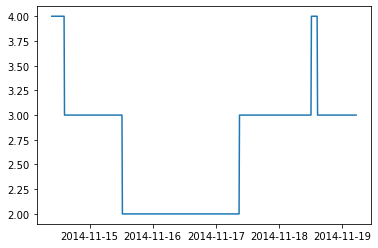

In [6]:
plot(df.Timestamp, df.Bikes)

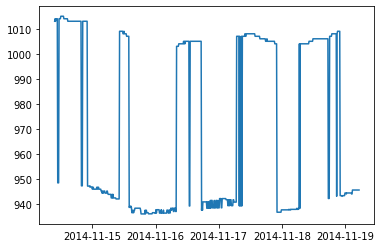

In [7]:
plot(df.Timestamp, df.Pressure)

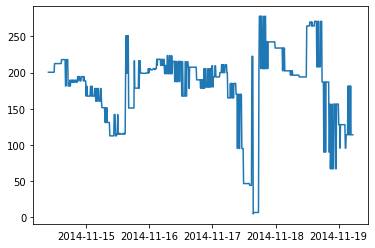

In [18]:
plot(df.Timestamp, df.WindDeg)

In [24]:
df1 = df.set_index('Timestamp')

mean_hours = df1.groupby([df1.index.hour]).mean()
mean_hours

,Bikes,Slots,Total,Humidity,Pressure,WindDeg,WindSpeed,TemperatureTemp
Timestamp,,,,,,,,
0,2.600000,5.600000,8.200000,96.400000,941.321333,185.468807,1.002333,5.867333
1,2.600000,5.600000,8.200000,96.133333,941.290333,187.585567,1.011667,5.767667
2,2.600000,5.600000,8.200000,96.633333,941.449667,183.601947,1.049667,5.986000
3,2.600000,5.600000,8.200000,96.166667,941.272000,188.368500,1.121333,5.900000
4,2.600000,5.600000,8.200000,96.700000,941.260000,185.234967,1.054667,5.890000
5,2.555556,5.666667,8.222222,96.814815,940.709259,185.650111,1.059630,6.234074
6,2.500000,5.750000,8.250000,96.666667,945.692500,181.213208,1.050417,7.307917
7,2.500000,5.750000,8.250000,93.625000,970.156250,180.944375,1.183750,8.918750
8,2.500000,5.750000,8.250000,97.000000,977.874167,178.672375,1.100417,8.450833


<BarContainer object of 24 artists>

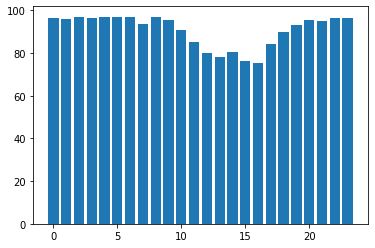

In [28]:
bar(mean_hours.index, mean_hours.Humidity)

<BarContainer object of 24 artists>

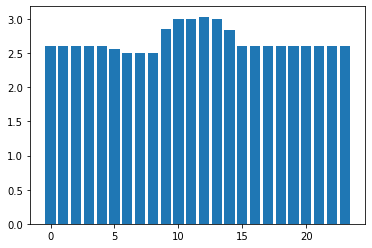

In [31]:
bar(mean_hours.index, mean_hours.Bikes)

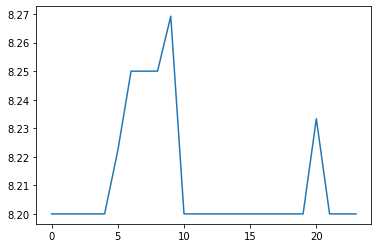

In [33]:
plot(mean_hours.index, mean_hours.Total)

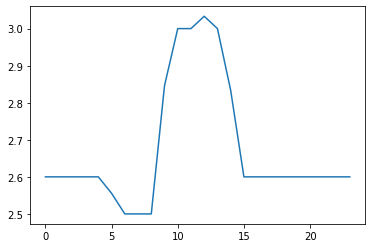

In [34]:
plot(mean_hours.index, mean_hours.Bikes) #voir pour comparer bikes/total, pie ? 
#-> probleme on doit faire un camembert pour chaque heure

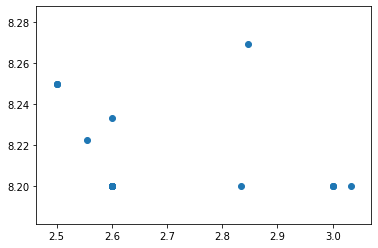

In [36]:
scatter(mean_hours.Bikes, mean_hours.Total) #criticable à voir si utile

In [50]:
def board(name):
    with gzip.open(name, "rb") as day:
        df = pd.read_csv(day, sep=";", parse_dates=['Timestamp'])
    df.describe()
    plot(df.Timestamp, df.Bikes)
    plot(df.Timestamp, df.Pressure)
    plot(df.Timestamp, df.WindDeg)
    df1 = df.set_index('Timestamp')
    mean_hours = df1.groupby([df1.index.hour]).mean()
    mean_hours
    bar(mean_hours.index, mean_hours.Humidity)
    bar(mean_hours.index, mean_hours.Bikes)
    plot(mean_hours.index, mean_hours.Total)
    plot(mean_hours.index, mean_hours.Bikes)
    scatter(mean_hours.Bikes, mean_hours.Total)
    matplotlib.pyplot.show() #mettre les différents plots sous forme de subplot/figure

In [51]:
board('data/clean/01. Duc/2014-11-14 09:40:00.csv.gz')

ValueError: view limit minimum -44387.80169056153 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units